In [1]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

team_id = 1
df = pd.read_csv("scaled_teams.csv")
points_df = pd.read_csv("scaled_points.csv")
scaled_games_df = pd.read_csv("scaled_games.csv")
games_df = pd.read_csv("games_processed.csv")

In [2]:

team = df.loc[df['id'] == team_id]
team = team[['year', 'abbrev', 'location', 'nickname', 'rankCalculatedFinal', 'record.overall.wins', 'record.overall.losses', 'record.overall.pointsFor', 'record.overall.pointsAgainst', 'scaled_pointsFor', 'scaled_pointsAgainst', 'residuals', 'pred_wins' ]]
team.rename(columns={'record.overall.wins': 'wins', 'record.overall.losses': 'losses', 'record.overall.pointsFor': 'pointsFor', 'record.overall.pointsAgainst': 'pointsAgainst', 'rankCalculatedFinal': 'finalRank'}, inplace=True)
#team.set_index("year", inplace=True)
team.sort_values('year', inplace=True)
team.head(10)

,year,abbrev,location,nickname,finalRank,wins,losses,pointsFor,pointsAgainst,scaled_pointsFor,scaled_pointsAgainst,residuals,pred_wins
12,2012,SEX,Here's My #,Call Me Brady,6,9,4,1415.0,1270.0,0.564041,-0.776622,0.985953,8.014047
27,2013,KAP!,Kaptain,Mexicana,4,9,4,1485.7,1382.0,0.187645,-1.375147,0.860023,8.139977
39,2014,MK,Mighty,Kites,10,5,8,1497.7,1590.7,0.070461,1.251402,-0.318075,5.318075
51,2015,JVB!,I Don't Want,Your Life,6,7,6,1490.8,1423.5,0.357305,-0.382989,-0.348457,7.348457
62,2016,BBC,Broken,Balcony Chair,5,9,4,1512.2,1266.7,0.510800,-1.944866,-0.134018,9.134018
73,2017,GOD,Jackhammer,Jesus,3,6,7,1321.2,1340.7,-0.288118,-0.409031,-0.546972,6.546972
85,2018,#1,Mike,Piazza,1,10,3,2263.1,1832.9,2.084734,0.193745,1.022148,8.977852
97,2019,#1,Lanford,Lions,3,7,6,1787.8,1773.3,0.575659,0.313317,0.079671,6.920329
108,2020,#1,Lanford,Lions,3,11,2,1899.1,1624.8,0.939520,-0.857105,2.422410,8.577590
0,2021,Caw,Birds,Of War,0,7,6,1863.8,1649.0,0.988292,-0.833521,-1.616169,8.616169


In [3]:
team[["wins", "losses"]].mean()

wins      8.0
losses    5.0
dtype: float64

<AxesSubplot:xlabel='year'>

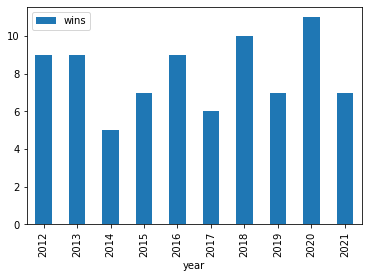

In [4]:
team[["wins", 'year']].plot(kind="bar", x='year')

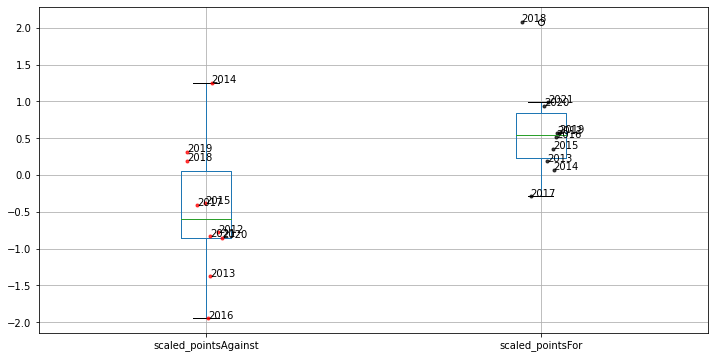

In [5]:
ax = team.boxplot(column=["scaled_pointsAgainst", "scaled_pointsFor"], figsize=(12,6))
for index, t in team.iterrows():
    y = t["scaled_pointsFor"]
    x = np.random.normal(2, 0.04)
    ax.plot(x, y, 'k.', alpha=0.75)
    ax.text(x, y, t['year'])
    y_for = t["scaled_pointsAgainst"]
    x_for = np.random.normal(1, 0.04)
    ax.plot(x_for, y_for, 'r.', alpha=0.75)
    ax.text(x_for, y_for, t['year'])

In [6]:
team_points = points_df.loc[points_df["team_id"] == team_id]
team_points.head(10)

,year,team_id,diff,scaled_diff
0,2018,1,-1409.7,-2.356939
12,2019,1,-517.1,0.202299
24,2020,1,-967.9,-2.270358
37,2021,1,-267.8,0.070512


In [7]:
scaled_games = scaled_games_df.loc[scaled_games_df['Team'] == team_id]
scaled_games.head(10)

,year,Team,lucky_win,unlucky_loss,scaled_lucky_win,scaled_unlucky_loss
0,2012,1,2,2,0.145865,0.229416
16,2013,1,2,2,0.192450,0.562254
28,2014,1,1,4,-0.904534,1.613603
40,2015,1,4,1,1.956703,-0.485071
52,2016,1,4,2,2.064742,0.208514
64,2017,1,1,4,-0.694314,1.754656
76,2018,1,0,3,-1.659308,0.694314
88,2019,1,0,2,-0.933257,0.392232
100,2020,1,0,1,-1.305460,-1.000000
112,2021,1,0,1,-1.719101,-0.447214


In [8]:
games = games_df.loc[games_df['Team'] == team_id]
games.sort_values("year", inplace=True)
games.head()

,Unnamed: 0,Unnamed: 0.1,Week,Team,Margin,Score,OppScore,year,week_mean,abbrev,id,win,for_diff,against_diff,unlucky_loss,lucky_win
393,393,98,2,1,57.0,110.0,53.0,2012,102.6250,SEX,1,True,7.3750,-49.6250,0,0
406,406,199,15,1,25.0,129.0,104.0,2012,102.5625,SEX,1,True,26.4375,1.4375,0,0
405,405,189,14,1,-1.0,121.0,122.0,2012,104.4375,SEX,1,False,16.5625,17.5625,1,0
404,404,184,13,1,-57.0,100.0,157.0,2012,105.8750,SEX,1,False,-5.8750,51.1250,0,0
403,403,176,12,1,-22.0,120.0,142.0,2012,109.1250,SEX,1,False,10.8750,32.8750,1,0


IndexError: index 3 is out of bounds for axis 0 with size 3

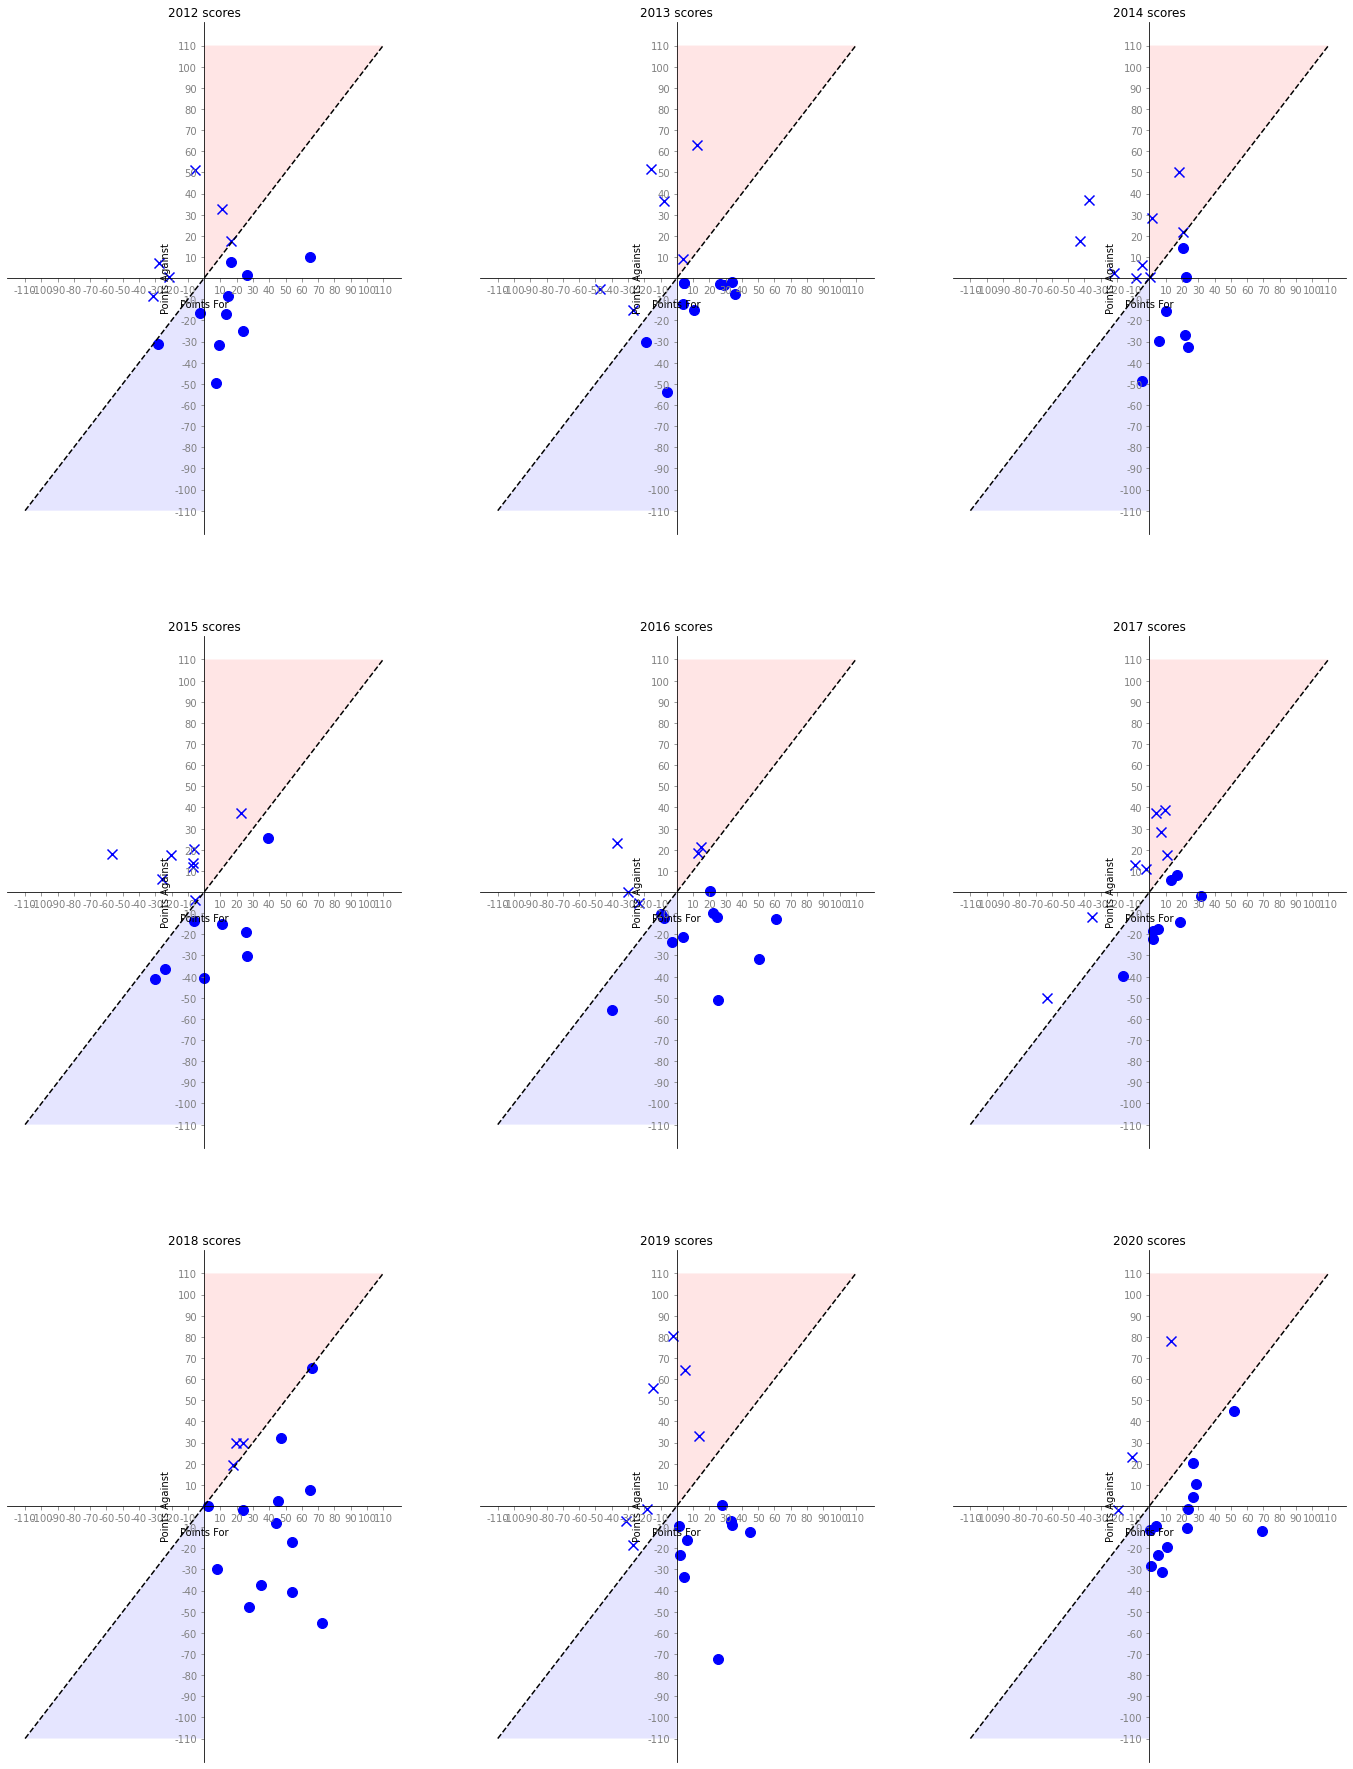

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(24,32))

z = 110

def build_plot(ax, data):
    ax.fill_between([-z,0], -z, [-z,0], facecolor='b', alpha=0.1)
    ax.fill_between([0,z], [0,z], z, facecolor='r', alpha=0.1)

    ax.scatter(data=data.query('win'), x='for_diff', y='against_diff', 
            c='b', 
            s=100,
            marker='o',
            label='Win')
    ax.scatter(data=data.query('not win'), x='for_diff', y='against_diff', 
            c='b', 
            s=100,
            marker='x',
            label='Loss')
    ax.plot([-z,z],[-z,z], 'k--')

    ax.set_xlabel('Points For')
    ax.set_ylabel('Points Against')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()

    tx = list(range(-z,z+1,10))
    tx.remove(0)
    ax.yaxis.set(ticks=tx, ticklabels=tx)
    ax.xaxis.set(ticks=tx, ticklabels=tx)

    ax.tick_params(axis='x', colors='gray')
    ax.tick_params(axis='y', colors='gray')
    
    ax.set(title='{} scores'.format(data["year"].iloc[0]))

for idx, x in enumerate(games["year"].unique()):
    row = math.trunc(idx/3)
    col = idx - (row * 3)
    build_plot(ax[row][col], games.loc[games["year"] == x])